In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [13]:
auto_df = pd.read_csv('Automobile.csv')

auto_df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


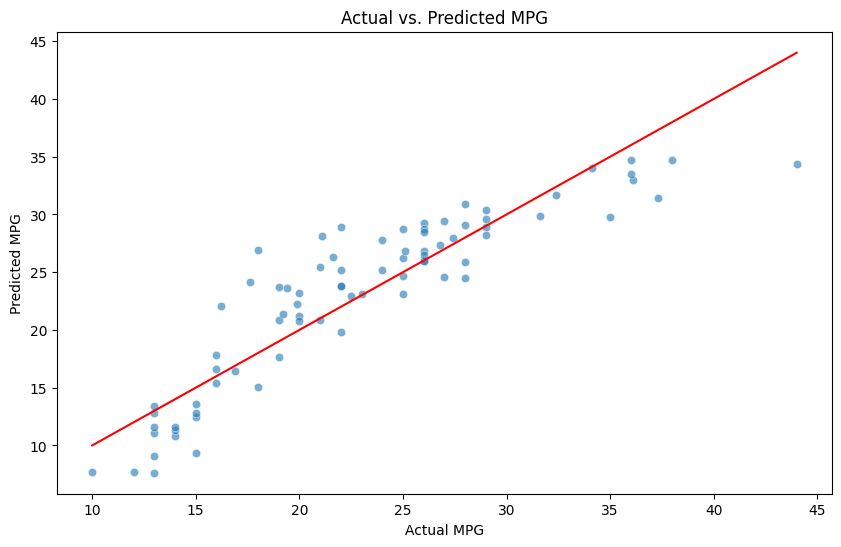

(10.502370329417303,
 0.7942349075428591,
 394    9.626574
 111    8.884108
 270    7.039500
 389    6.904627
 366    6.582221
 Name: mpg, dtype: float64)

In [14]:
auto_df_clean = auto_df.dropna()

# Features and Labels
features = auto_df_clean.drop(['mpg', 'name', 'origin'], axis=1)  # Dropping non-numeric and target columns
labels = auto_df_clean['mpg']

# Splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Training
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predicting and evaluating the model
y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Identify inaccurate predictions
errors = abs(y_pred - y_test)
worst_predictions = errors.nlargest(5)

# Actual vs Predicted MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red')  # perfect predictions
plt.title('Actual vs. Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

# Performance metrics
mse, r2, worst_predictions


In [15]:

test_with_names = auto_df_clean.loc[y_test.index]
test_with_names['Predicted MPG'] = y_pred

# Calculate prediction errors 
test_with_names['Prediction Error'] = abs(test_with_names['Predicted MPG'] - test_with_names['mpg'])

# top 5 samples with largest prediction errors
top_errors_with_names = test_with_names.nlargest(5, 'Prediction Error')[['name', 'mpg', 'Predicted MPG', 'Prediction Error']]

top_errors_with_names


,name,mpg,Predicted MPG,Prediction Error
394,vw pickup,44.0,34.373426,9.626574
111,maxda rx3,18.0,26.884108,8.884108
270,toyota celica gt liftback,21.1,28.139500,7.039500
389,ford granada l,22.0,28.904627,6.904627
366,chrysler lebaron salon,17.6,24.182221,6.582221
